In [1]:
import os
os.chdir('/Users/a568594/Desktop/CF')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read Ratings data 

In [2]:
ratings = pd.read_csv('ratings.csv')

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


## Read Movies data 

In [4]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Combine the 2 datasets 

In [5]:
ratings = pd.merge(ratings[['userId','movieId','rating']],movies[['movieId','title','genres']],
                  how ='left',left_on='movieId',right_on='movieId')

## Create user-movie rating matrix 

In [6]:
rp = ratings.pivot_table(columns =['movieId'], index=['userId'], values='rating')
rp.fillna(0, inplace=True)

In [7]:
# Converting pandas dataframe to numpy for faster execution in loops etc.
rp_mat = rp.as_matrix()

In [8]:
rp_mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.]])

In [9]:
from scipy.spatial.distance import cosine

## Calculate the Cosine Distance 

In [10]:
a= np.asarray( [2, 1, 0, 2, 0, 1, 1, 1])
b = np.asarray( [2, 1, 1, 1, 1, 0, 1, 1])
print ("Cosine similarity between A and B is",round(1-cosine(a,b),4))

Cosine similarity between A and B is 0.8216


## Creating a User Similarity Matrix 

In [11]:
m, n = rp.shape
mat_users = np.zeros((m, m))
for i in range(m):
    for j in range(m):
        if i != j:
            mat_users[i][j] = (1- cosine(rp_mat[i,:], rp_mat[j,:]))
        else:
            mat_users[i][j] = 0.
            
pd_users = pd.DataFrame(mat_users,index =rp.index ,columns= rp.index )

In [12]:
pd_users.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.000000,0.074482,0.016818,0.000000,0.083884,0.000000,0.012843,0.000000,...,0.000000,0.000000,0.014474,0.043719,0.000000,0.000000,0.000000,0.062917,0.000000,0.017466
2,0.000000,0.000000,0.124295,0.118821,0.103646,0.000000,0.212985,0.113190,0.113333,0.043213,...,0.477306,0.063202,0.077745,0.164162,0.466281,0.425462,0.084646,0.024140,0.170595,0.113175
3,0.000000,0.124295,0.000000,0.081640,0.151531,0.060691,0.154714,0.249781,0.134475,0.114672,...,0.161205,0.064198,0.176134,0.158357,0.177098,0.124562,0.124911,0.080984,0.136606,0.170193
4,0.074482,0.118821,0.081640,0.000000,0.130649,0.079648,0.319745,0.191013,0.030417,0.137186,...,0.114319,0.047228,0.136579,0.254030,0.121905,0.088735,0.068483,0.104309,0.054512,0.211609
5,0.016818,0.103646,0.151531,0.130649,0.000000,0.063796,0.095888,0.165712,0.086616,0.032370,...,0.191029,0.021142,0.146173,0.224245,0.139721,0.058252,0.042926,0.038358,0.062642,0.225086


## Finding Similar Users 

In [13]:
def topn_simusers(uid=16,n=5):
    users = pd_users.loc[uid,:].sort_values(ascending=False)
    topn_users = users.iloc[:n,]
    topn_users = topn_users.rename('score')
    print('Similar Users as User:',uid)
    return pd.DataFrame(topn_users)
print (topn_simusers(uid=2,n=10))

Similar Users as User: 2
           score
userId          
338     0.581528
369     0.580742
151     0.573097
400     0.571252
385     0.565113
161     0.558074
649     0.551430
279     0.547875
144     0.538397
590     0.537934


## Creating a Movie Similarity Matrix 

In [14]:
import time
start_time = time.time()
mat_movies = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i!=j:
            mat_movies[i,j] = (1- cosine(rp_mat[:,i], rp_mat[:,j]))
        else:
            mat_movies[i,j] = 0.
print("--- %s seconds ---" % (time.time() - start_time))

--- 3626.218812942505 seconds ---


In [15]:
pd_movies = pd.DataFrame(mat_movies,index = rp.columns,columns = rp.columns)

In [16]:
pd_movies.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.394511,0.306516,0.133614,0.245102,0.377086,0.278629,0.063031,0.117499,0.310689,...,0.055829,0.031902,0.079755,0.079755,0.079755,0.079755,0.079755,0.0,0.0,0.055829
2,0.394511,0.000000,0.217492,0.164651,0.278476,0.222003,0.207299,0.223524,0.113669,0.418124,...,0.000000,0.055038,0.068797,0.082557,0.082557,0.137594,0.068797,0.0,0.0,0.000000
3,0.306516,0.217492,0.000000,0.177012,0.370732,0.247499,0.435648,0.127574,0.306717,0.191255,...,0.000000,0.000000,0.000000,0.116226,0.116226,0.000000,0.000000,0.0,0.0,0.000000
4,0.133614,0.164651,0.177012,0.000000,0.179556,0.072518,0.184626,0.501513,0.254630,0.111447,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
5,0.245102,0.278476,0.370732,0.179556,0.000000,0.272645,0.388476,0.194113,0.367941,0.246846,...,0.000000,0.176845,0.000000,0.117897,0.117897,0.000000,0.000000,0.0,0.0,0.000000


## Finding Similar Movies 

In [17]:
def topn_simovies(mid = 588,n=15):
    mid_ratings = pd_movies.loc[mid,:].sort_values(ascending = False)
    topn_movies = pd.DataFrame(mid_ratings.iloc[:n,])
    topn_movies['index1'] = topn_movies.index
    topn_movies['index1'] = topn_movies['index1'].astype('int64')
    topn_movies = pd.merge(topn_movies,movies[['movieId','title']],how = 'left',left_on ='index1' ,right_on = 'movieId')
    print ("Movies similar to movie id:",mid,",",movies['title'][movies['movieId']==mid].to_string(index=False),",are")
    del topn_movies['index1']
    return topn_movies

In [18]:
print (topn_simovies(mid=589,n=15))

Movies similar to movie id: 589 , Terminator 2: Judgment Day (1991) ,are
         589  movieId                                              title
0   0.702256      480                               Jurassic Park (1993)
1   0.636392     1240                             Terminator, The (1984)
2   0.633428      110                                  Braveheart (1995)
3   0.619415      356                                Forrest Gump (1994)
4   0.614814      377                                       Speed (1994)
5   0.605887      380                                   True Lies (1994)
6   0.604555      457                               Fugitive, The (1993)
7   0.591071      593                   Silence of the Lambs, The (1991)
8   0.579325      367                                   Mask, The (1994)
9   0.577299     1036                                    Die Hard (1988)
10  0.576275      592                                      Batman (1989)
11  0.568341      296                              

## Application of Matrix Factorisation

### Transpose the Ratings table into User-Item Rating Matrix for factorization 

In [19]:
rp = ratings.pivot_table(columns = ['movieId'],index = ['userId'],values = 'rating')
rp = rp.fillna(0)

In [20]:
rp.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
A = rp.values

In [22]:
print ("\nShape of Original Sparse Matrix",A.shape)


Shape of Original Sparse Matrix (671, 9066)


## Consider only the >0 rated elements for Learning

In [23]:
W = A>0.5
W[W==True]=1
W[W==False]=0
W = W.astype(np.float64,copy=False)

In [24]:
W

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

## Consider only the 0 rated elements for Predictions 

In [25]:
W_pred = A<0.5
W_pred[W_pred==True]=1
W_pred[W_pred==False]=0
W_pred = W_pred.astype(np.float64,copy=False)
np.fill_diagonal(W_pred,val=0)

In [26]:
W_pred

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.]])

## ALS 

0  iterations completed RMSError value is: 2.1525697830603385
10  iterations completed RMSError value is: 1.715952655155801
20  iterations completed RMSError value is: 1.7072849463649327
30  iterations completed RMSError value is: 1.7035460065183443
40  iterations completed RMSError value is: 1.7014938709153253
50  iterations completed RMSError value is: 1.700211268628024
60  iterations completed RMSError value is: 1.6993283090954265
70  iterations completed RMSError value is: 1.6986781373652955
80  iterations completed RMSError value is: 1.6981768908038581
90  iterations completed RMSError value is: 1.6977773263616687
100  iterations completed RMSError value is: 1.6974504945064888
110  iterations completed RMSError value is: 1.6971776095443016
120  iterations completed RMSError value is: 1.6969459379202072
130  iterations completed RMSError value is: 1.6967465310247027
140  iterations completed RMSError value is: 1.6965729052525054
150  iterations completed RMSError value is: 1.696420

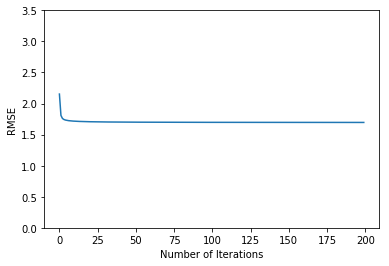

In [27]:
# Parameters
m,n = A.shape

n_iterations = 200
n_factors = 100
lmbda = 0.001

X = 5 * np.random.rand(m,n_factors)
Y = 5* np.random.rand(n_factors,n)

def get_error(A, X, Y, W):
    return np.sqrt(np.sum((W * (A - np.dot(X, Y)))**2)/np.sum(W))

errors = []
for itr in range(n_iterations):
    X = np.linalg.solve(np.dot(Y,Y.T)+ lmbda * np.eye(n_factors),np.dot(Y,A.T)).T
    Y = np.linalg.solve(np.dot(X.T,X)+ lmbda * np.eye(n_factors),np.dot(X.T,A))
    
    if itr%10 == 0:
        print(itr," iterations completed","RMSError value is:",get_error(A,X,Y,W))
                 
    errors.append(get_error(A,X,Y,W))

A_hat = np.dot(X,Y)
print ("RMSError of rated movies: ",get_error(A,X,Y,W))
    

plt.plot(errors);
plt.ylim([0, 3.5]);
plt.xlabel("Number of Iterations");plt.ylabel("RMSE")
#plt.title("No.of Iterations vs. RMSE")
plt.show()

In [28]:
def print_recommovies(uid=315,n_movies=15,pred_mat = A_hat,wpred_mat = W_pred ):
    pred_recos = pred_mat*wpred_mat
    pd_predrecos = pd.DataFrame(pred_recos,index =rp.index ,columns= rp.columns )
    pred_ratings = pd_predrecos.loc[uid,:].sort_values(ascending = False)
    pred_topratings = pred_ratings[:n_movies,]
    pred_topratings = pred_topratings.rename('pred_ratings')  
    pred_topratings = pd.DataFrame(pred_topratings)
    pred_topratings['index1'] = pred_topratings.index
    pred_topratings['index1'] = pred_topratings['index1'].astype('int64')
    pred_topratings = pd.merge(pred_topratings,movies[['movieId','title']],how = 'left',left_on ='index1' ,right_on = 'movieId')
    del pred_topratings['index1']    
    print ("\nTop",n_movies,"movies predicted for the user:",uid," based on collaborative filtering\n")
    return pred_topratings

In [29]:
predmtrx = print_recommovies(uid=355,n_movies=10,pred_mat=A_hat,wpred_mat=W_pred)
print (predmtrx)


Top 10 movies predicted for the user: 355  based on collaborative filtering

   pred_ratings  movieId                                title
0      2.678860     1213                    Goodfellas (1990)
1      2.449792     1197           Princess Bride, The (1987)
2      2.275619     1923  There's Something About Mary (1998)
3      2.072617     5010               Black Hawk Down (2001)
4      2.062469     2987      Who Framed Roger Rabbit? (1988)
5      2.038447     5903                   Equilibrium (2002)
6      1.960748     8798                    Collateral (2004)
7      1.906747     8622               Fahrenheit 9/11 (2004)
8      1.821751     8957                           Saw (2004)
9      1.817924     1298          Pink Floyd: The Wall (1982)


In [30]:
# Grid Search for CF
def get_error(A, X, Y, W):
    return np.sqrt(np.sum((W*(A-np.dot(X,Y))**2/np.sum(W))))
niters = [20,50,100,200]
factors = [30,50,70,100]
lambdas = [0.001,0.01,0.05,0.1]

init_error = float('inf')
print("\n\nGrid Search results of ALS Matrix Factorization:\n")

for niter in niters:
     for facts in factors:
            for lmbd in lambdas:
                
                X = 5* np.random.rand(m, facts)
                Y = 5* np.random.rand(facts,n)
                
                for itr in range(niter):
                    X = np.linalg.solve(np.dot(Y,Y.T) +lmbd*np.eye(facts),np.dot(Y,A.T)).T
                    Y = np.linalg.solve(np.dot(X.T,X) +lmbd*np.eye(facts),np.dot(X.T,A))
                error = get_error(A, X, Y, W)
                
                if error<init_error:
                    print ("No.of iters",niter,"No.of Factors",facts,"Lambda",lmbd,"RMSE",error)
                    init_error = error



Grid Search results of ALS Matrix Factorization:

No.of iters 20 No.of Factors 30 Lambda 0.001 RMSE 2.318738204953951
No.of iters 20 No.of Factors 50 Lambda 0.001 RMSE 2.1036008963226798
No.of iters 20 No.of Factors 70 Lambda 0.001 RMSE 1.929575167349627
No.of iters 20 No.of Factors 100 Lambda 0.001 RMSE 1.7074291518177451
No.of iters 50 No.of Factors 100 Lambda 0.001 RMSE 1.700719494353351
No.of iters 50 No.of Factors 100 Lambda 0.1 RMSE 1.7001925849514214
No.of iters 100 No.of Factors 100 Lambda 0.001 RMSE 1.6968301702589288
No.of iters 200 No.of Factors 100 Lambda 0.001 RMSE 1.6958355285052729
No.of iters 200 No.of Factors 100 Lambda 0.1 RMSE 1.695467672756167
